# Inflation yoy

Getting datasets list: 100%|██████████| 214/214 [00:00<00:00, 383.44it/s]
!!! Wrong query or api.insee.fr error !!!
!!! SDMX web service used instead of API !!!
1/1 - Getting series: 100%|██████████| 13/13 [00:13<00:00,  1.00s/it]
Data has been cached



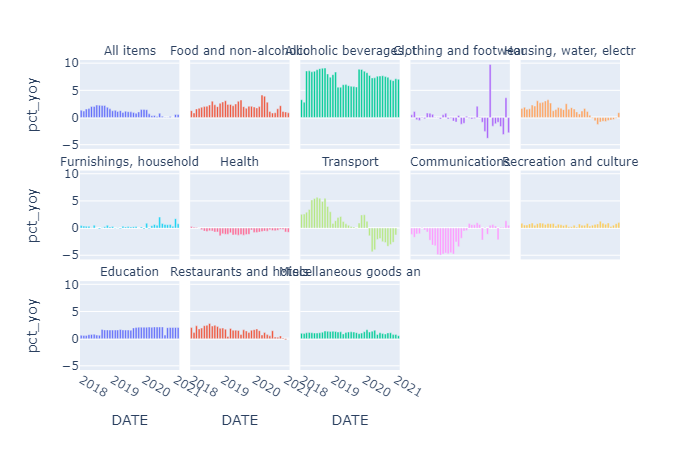

In [1]:
from pynsee.macrodata import * 

import plotly.express as px
from plotly.offline import plot

# Subscribe to api.insee.fr and get your credentials!
# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import *; clear_all_cache()
import os
os.environ['insee_key'] = "my_key"
os.environ['insee_secret'] = "my_secret_key"

df_idbank = get_idbank_list("IPC-2015")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.NATURE == "INDICE") & # index
                          (df_idbank.MENAGES_IPC == "ENSEMBLE") & # all kinds of household
                          (df_idbank.REF_AREA == "FE") & # all France including overseas departements
                          (df_idbank.COICOP2016.str.match("^[0-9]{2}$"))] # coicop aggregation level

# get data
data = get_insee_idbank(df_idbank.IDBANK)

# split title
df = split_title(data)

# replace title when missing and shorten it
rows = df["TITLE_EN6"].isnull()
df.loc[rows, "TITLE_EN6"] = df.loc[rows, "TITLE_EN5"]
df["TITLE_EN6"] = df["TITLE_EN6"].str[:22]

# compute year over year growth rate by IDBANK
df['pct_yoy'] = (df.OBS_VALUE/ df.groupby(['IDBANK']).OBS_VALUE.shift(12) - 1) * 100

# select dates after 2018-01-01
df = df.iloc[df.DATE >= "2018-01-01"]

# plot
fig = px.bar(df, x = 'DATE', y = "pct_yoy", color = "TITLE_EN6",
             facet_col = "TITLE_EN6", facet_col_wrap = 5)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_layout(showlegend=False)
fig.show('png')